In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("G:\CovidDataset\Data\covid-data(cleaned).csv")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\asus\AppData\Local\Temp\ipykernel_20336\947282433.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("G:\CovidDataset\Data\covid-data(cleaned).csv")


In [3]:
top_cases = df.groupby('country')['total_cases'].max().sort_values(ascending=False)
top_deaths = df.groupby('country')['total_deaths'].max().sort_values(ascending=False)

In [4]:
top_cases_df = top_cases.reset_index()
top_deaths_df = top_deaths.reset_index()

In [5]:
countries_by_deaths = (pd.merge(top_cases_df, top_deaths_df, on='country', how='outer')
                    .sort_values('total_deaths', ascending=False).reset_index(drop=True))
countries_by_deaths

,country,total_cases,total_deaths
0,United States,103436829,1193165.0
1,Brazil,37511921,702116.0
2,India,45041748,533623.0
3,Russia,24268728,403188.0
4,Mexico,7619458,334551.0
...,...,...,...
226,Falkland Islands,1923,0.0
227,Turkmenistan,0,0.0
228,Niue,1074,0.0
229,Saint Helena,2166,0.0


In [6]:
countries = countries_by_deaths.loc[:10,"country"].values
countries

array(['United States', 'Brazil', 'India', 'Russia', 'Mexico',
       'United Kingdom', 'Peru', 'Italy', 'Indonesia', 'Iran', 'Colombia'],
      dtype=object)

In [7]:
df_countries = df[df['country'].isin(countries)].copy()
df_countries

,continent,country,date,total_cases,new_cases,total_deaths,new_deaths,population,population_density
46872,South America,Brazil,2020-01-05,0,0.0,0.0,0.0,215313504,25.04
46873,South America,Brazil,2020-01-06,0,0.0,0.0,0.0,215313504,25.04
46874,South America,Brazil,2020-01-07,0,0.0,0.0,0.0,215313504,25.04
46875,South America,Brazil,2020-01-08,0,0.0,0.0,0.0,215313504,25.04
46876,South America,Brazil,2020-01-09,0,0.0,0.0,0.0,215313504,25.04
...,...,...,...,...,...,...,...,...,...
368275,North America,United States,2024-07-31,103436829,NaN,1192546.0,0.0,338289856,35.61
368276,North America,United States,2024-08-01,103436829,NaN,1192546.0,0.0,338289856,35.61
368277,North America,United States,2024-08-02,103436829,NaN,1192546.0,0.0,338289856,35.61
368278,North America,United States,2024-08-03,103436829,NaN,1192546.0,0.0,338289856,35.61


# نمودار زمانی new_cases برای چند کشور

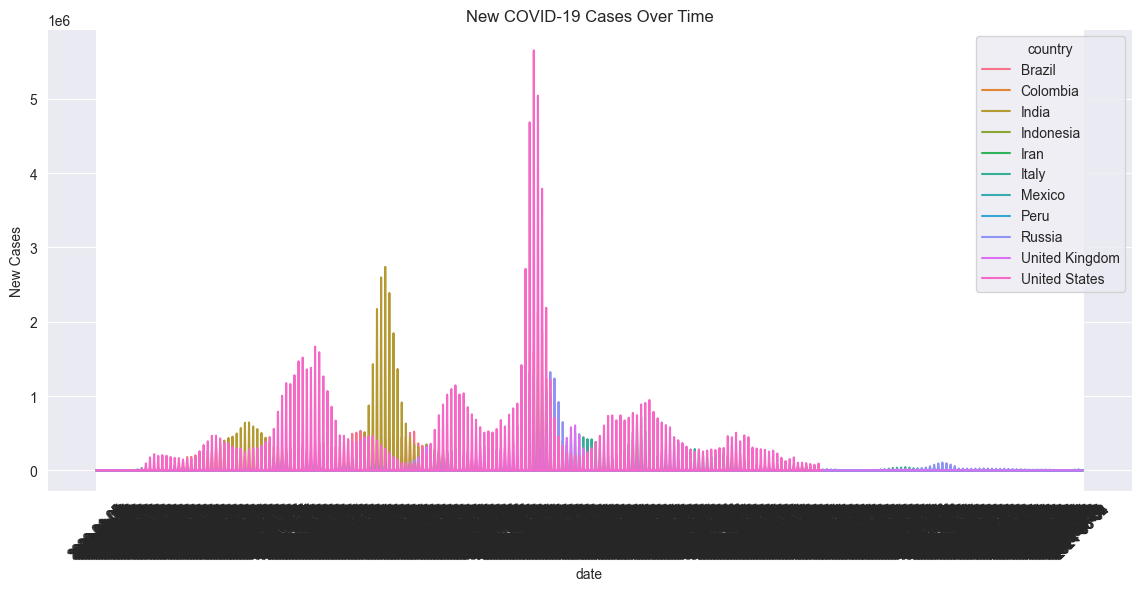

In [8]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df_countries, x='date', y='new_cases', hue='country')
plt.title("New COVID-19 Cases Over Time")
plt.ylabel("New Cases")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [9]:
# محاسبه میانگین متحرک ۷ روزه
df_countries['new_cases_smooth'] = (df_countries.groupby('country')['new_cases']
                                    .transform(lambda x: x.rolling(window=7, min_periods=1).mean()))


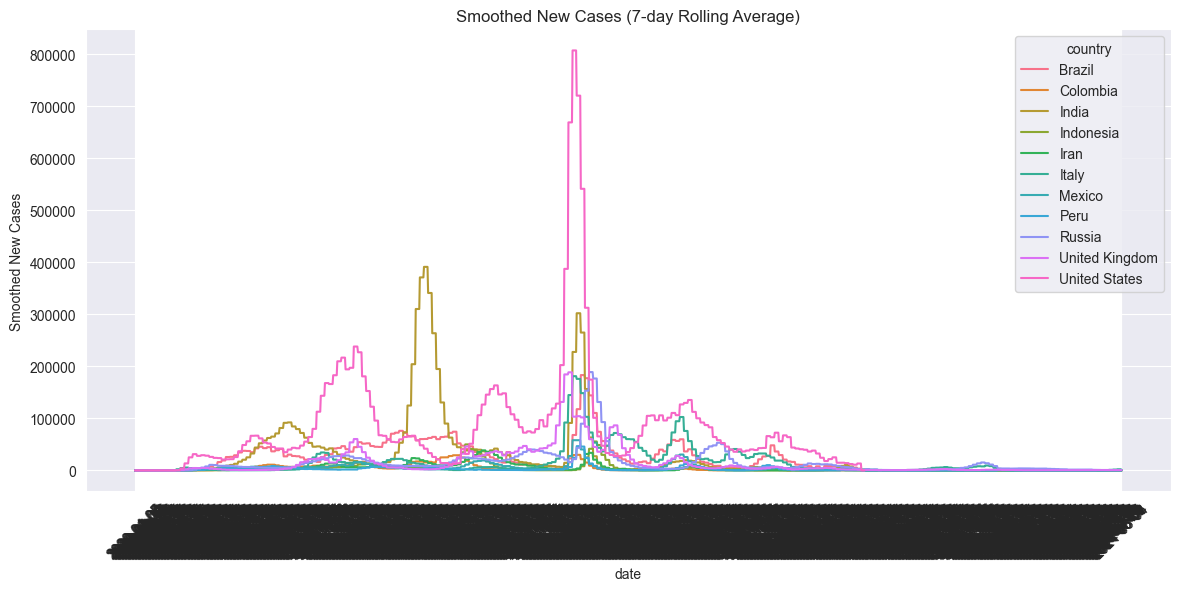

In [10]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df_countries, x='date', y='new_cases_smooth', hue='country')
plt.title("Smoothed New Cases (7-day Rolling Average)")
plt.ylabel("Smoothed New Cases")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [11]:
df_countries.groupby('country')['new_cases_smooth'].idxmax()

country
Brazil             47628
Colombia           72731
India             154498
Indonesia         156459
Iran              157944
Italy             166468
Mexico            218369
Peru              271937
Russia            287024
United Kingdom    365667
United States     367348
Name: new_cases_smooth, dtype: int64

In [12]:
df.loc[df_countries.groupby('country')['new_deaths'].idxmax()]

,continent,country,date,total_cases,new_cases,total_deaths,new_deaths,population,population_density
47327,South America,Brazil,2021-04-04,12910082,505668.0,328206.0,21094.0,215313504,25.04
72521,South America,Colombia,2021-06-27,4092746,204132.0,103321.0,4575.0,51874028,44.22
154512,Asia,India,2021-05-23,26530132,1846055.0,299266.0,28982.0,1417173120,450.42
156256,Asia,Indonesia,2021-08-01,3440396,273891.0,95723.0,12444.0,275501344,145.72
157958,Asia,Iran,2021-08-29,4895448,254753.0,105901.0,4547.0,88550568,49.83
165817,Europe,Italy,2020-04-05,124632,32160.0,15362.0,5339.0,59037472,205.86
218005,North America,Mexico,2021-01-24,1846628,104374.0,176696.0,9877.0,127504120,66.44
271664,South America,Peru,2021-04-25,1745655,56604.0,161809.0,5727.0,34049588,25.13
286940,Europe,Russia,2021-11-21,9331158,260484.0,264095.0,8709.0,144713312,8.82
365317,Europe,United Kingdom,2021-01-24,3708849,246142.0,120848.0,9723.0,67508936,272.90


In [13]:
df.loc[df.groupby('country')['total_cases'].idxmax()][['country', 'date', 'total_cases']]

,country,date,total_cases
1582,Afghanistan,2024-05-05,235214
3256,Albania,2024-05-05,335047
5021,Algeria,2024-08-04,272139
6373,American Samoa,2023-09-17,8359
7914,Andorra,2023-05-07,48015
...,...,...,...
379710,Vietnam,2023-10-22,11624000
381517,Wallis and Futuna,2024-03-03,3760
382708,Yemen,2022-11-06,11945
385019,Zambia,2024-08-04,349842


In [14]:
#تاریخ اوج هر کشور
peak_dates = df_countries.groupby('country')['new_cases_smooth'].idxmax()
df_peak_info = df_countries.loc[peak_dates, ['country', 'date', 'new_cases_smooth']]
print(" تاریخ اوج موارد جدید هر کشور:")
df_peak_info

 تاریخ اوج موارد جدید هر کشور:


,country,date,new_cases_smooth
47628,Brazil,2022-01-30,183289.142857
72731,Colombia,2022-01-23,30023.000000
154498,India,2021-05-09,391279.571429
156459,Indonesia,2022-02-20,55675.285714
157944,Iran,2021-08-15,38567.857143
166468,Italy,2022-01-16,181164.714286
218369,Mexico,2022-01-23,58116.428571
271937,Peru,2022-01-23,46675.714286
287024,Russia,2022-02-13,189055.857143
365667,United Kingdom,2022-01-09,188618.857143
